# Simulation - Methods of Computing Confidence Interval

Hongyue Zhu

***

## Dataset

The target dataset for this project records STAT 107 students’ average daily coffee consumption (in oz).
- Load the dataset and store it in a variable named `coffee`:

In [1]:
import pandas as pd
coffee = pd.read_csv("https://stat107.hknguyen.org/files/datasets/coffee.csv")

***

## 1. Sampling

- Get a sample without replacement of size 40 and store it in a variable named `my_sample`:

In [2]:
import random
random.seed(676186785)
my_sample = random.sample(list(coffee["coffee"]),k=40)

***

## 2. Confidence Interval Using Mathematical Statistics

Our goal is to use the mathematical formula to compute a 95% confidence interval for the true proportion of STAT 107 students who drink over 8 oz of coffee daily on average based on the sample we obtained.

- First calculate `p_hat`, the sample proportion of students who drink over 8 oz of coffee daily on average:

In [3]:
import numpy as np
p_hat = np.mean(np.array(my_sample) > 8)

- Then use the formula to calculate the lower and upper bound of a 95% confidence interval:

In [4]:
from scipy.stats import norm
p_hat - norm.ppf(1-0.05/2)*(p_hat*(1-p_hat)/40)**0.5

-0.006624323226237988

In [5]:
p_hat + norm.ppf(1-0.05/2)*(p_hat*(1-p_hat)/40)**0.5

0.15662432322623798

A 95% CI for the population proportion is (-0.0066, 0.1566), which is the same as (0, 0.1566).

It means that if we take many samples of the same size and each compute a 95% CI for population proportion, about 95% of the CIs will contain the true proportion of STAT 107 students who drink over 8 oz of coffee daily on average.

- Now we compute the true population proportion and check whether it is covered by the CI we have:

In [6]:
true_prop = np.mean(np.array(coffee) > 8)
true_prop

0.08333333333333333

Yes, (0, 0.1566) includes 0.0833, so the CI we computed covers the true population proportion of STAT 107 students who drink over 8 oz of coffee daily on average.

***

## 3. Confidence Interval Using Bootstrapping

Our goal is still to compute a 95% confidence interval for the true proportion of STAT 107 students who drink over 8 oz of coffee daily on average based on the sample we obtained, but this time use the Bootstrapping method.

- Resample from the original sample and compute the new sample proportion of students who drink over 8 oz of coffee daily on average. Repeat this for 5000 times and record each new sample proportion in a list named `sample_props`:

In [7]:
sample_props = []
for i in range(5000):
    new_sample = random.choices(my_sample, k=len(my_sample))
    prop = np.mean(np.array(new_sample) > 8)
    sample_props.append(prop)

- Then compute the lower and upper bound of a 95% confidence interval:

In [8]:
np.quantile(sample_props, q=0.05/2)

0.0

In [9]:
np.quantile(sample_props, q=1-0.05/2)

0.175

A 95% CI for the population proportion is (0, 0.175).

It means that if we take many samples of the same size and each compute a 95% CI for population proportion, about 95% of the CIs will contain the true proportion of STAT 107 students who drink over 8 oz of coffee daily on average.

- Now check whether the true population proportion is covered by the CI we have:

Yes, (0, 0.175) includes 0.0833, so the CI we computed covers the true population proportion of STAT 107 students who drink over 8 oz of coffee daily on average.

***

## 4. Compare the CI Coverages

Let's first compute the CI coverage for the CI computed using mathematical statistics.

- Get a sample of 40 from the population and compute a 95% confidence interval for the true proportion of STAT 107 students who drink over 8 oz of coffee daily on average based on the sample. Check whether the computed CI covers the true population proportion. Repeat this for 5000 times and record each result in a boolean list named `coverage_math`:

In [10]:
coverage_math = []
for i in range(5000):
    sample = random.sample(list(coffee["coffee"]),k=40)
    p_hat = np.mean(np.array(sample) > 8)
    lb = p_hat - norm.ppf(1-0.05/2)*(p_hat*(1-p_hat)/40)**0.5
    ub = p_hat + norm.ppf(1-0.05/2)*(p_hat*(1-p_hat)/40)**0.5
    if lb <= true_prop <= ub:
        coverage_math.append(True)
    else:
        coverage_math.append(False)

- Calculate the proportion of CIs that capture the true proportion:

In [11]:
np.mean(coverage_math)

0.886

Let's now compute the CI coverage for the CI computed using Bootstrapping.

- Similar process: Get a sample of 40 from the population and compute a 95% confidence interval for the true proportion of STAT 107 students who drink over 8 oz of coffee daily on average based on the sample. Check whether the computed CI covers the true population proportion. Repeat this for 5000 times and record each result in a boolean list named `coverage_boot`:

In [12]:
coverage_boot = []
for i in range(5000):
    sample = random.sample(list(coffee["coffee"]),k=40)
    sample_props = []
    for j in range(5000):
        new_sample = random.choices(sample, k=len(sample))
        prop = np.mean(np.array(new_sample) > 8)
        sample_props.append(prop)
    lb = np.quantile(sample_props, q=0.05/2)
    ub = np.quantile(sample_props, q=1-0.05/2)
    if lb <= true_prop <= ub:
        coverage_boot.append(True)
    else:
        coverage_boot.append(False)

- Calculate the proportion of CIs that capture the true proportion:

In [13]:
np.mean(coverage_boot)

0.8842

**Conclusion**: The CI coverage of both methods are roughly the same (88.6% for the mathematical statistics method and 88.42% for the Bootstrapping method). They are equally ineffective for this data, since they are both much lower than the expected coverage which should be around 95%.

**Reasoning for the ineffectiveness**: 

For the mathematical statistics CI, it assumes the population is normal, but actually it is not.

Below is the histgram of the population:

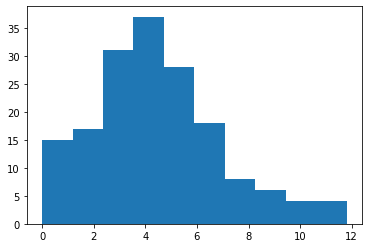

In [20]:
import matplotlib.pyplot as plt
plt.hist(coffee["coffee"])
plt.show()

We can see that it is not the exact shape of a normal distribution.

For the Bootstrapping method, it generally performs better when the distribution of the sample we got is “close” to the population distribution, but actually our sample distribution is very different from the population distribution.

Below is the histgram of our sample:

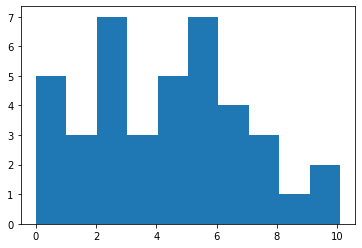

In [21]:
plt.hist(my_sample)
plt.show()

We can see that our sample distribution has totally different shape compared to our population distribution.